In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


#### Step 1: Data Loading

In [2]:
data=pd.read_csv("HR_comma_sep.csv.txt",delimiter=",")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#converting .txt to .csv
data.to_csv("HR_comma_sep.csv",index=False)

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Step 2: Exploratory Data Analysis (EDA)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
print(data['left'].value_counts())

0    11428
1     3571
Name: left, dtype: int64


In [10]:
data.drop_duplicates()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


#### By looking at the nature of Target column "left" we have to use Classification models like LogisticRegression, RandomForestClassifier, and SVC

In [11]:
data.shape

(14999, 10)

In [12]:
data=data.drop_duplicates()

In [13]:
data.shape[0]

11991

In [14]:
data.select_dtypes(include=['int64','float64']).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

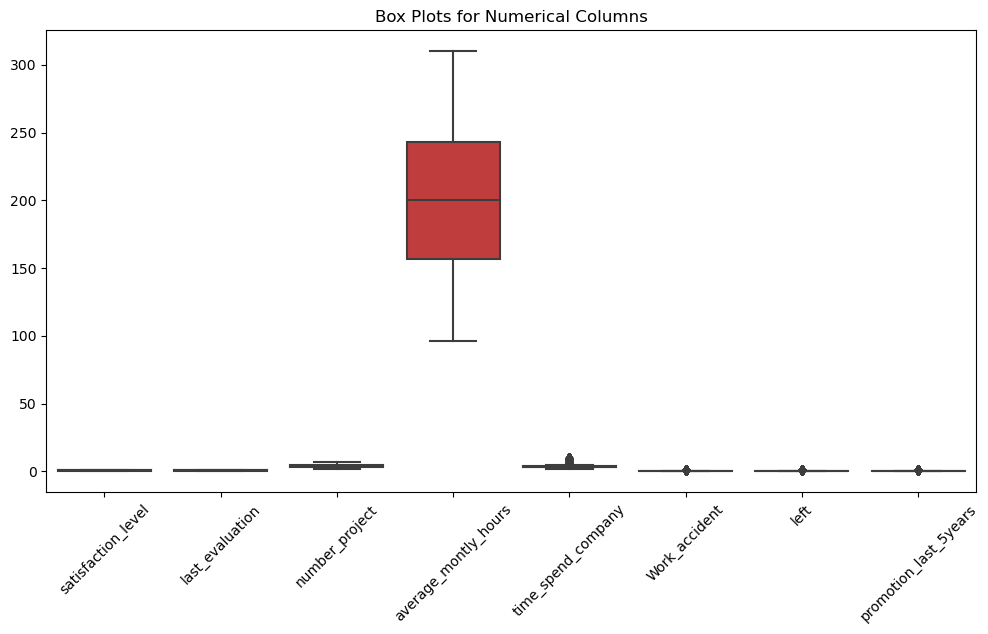

In [15]:
#Visualizing the Outliers
numerical_cols=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']
plt.figure(figsize=(12,6))
sns.boxplot(data=data[numerical_cols])
plt.title("Box Plots for Numerical Columns")
plt.xticks(rotation=45)
plt.show()


#### since there are no visible outliers from above box plot we don't have to perform removing outliers

#### Step 3: Data Preprocessing

In [16]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [17]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [18]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['sales','salary'], drop_first=True)

In [19]:
# Split data into features (X) and target (y)
X = data.drop(columns=['left'])
y = data['left']

In [20]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#applying Standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 4: Model Selection and Training

In [22]:
#Initialize
models={
    'Logistic Regression': LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
    
}

In [23]:
# Train and evaluate models
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Model:{name}")
    print(f"Accracy:{accuracy:.2f}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report (y_test,y_pred))
    print("="*50)


Model:Logistic Regression
Accracy:0.83
[[1928   70]
 [ 328   73]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.51      0.18      0.27       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.83      0.80      2399

Model:Random Forest
Accracy:0.98
[[1990    8]
 [  43  358]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Model:SVM
Accracy:0.96
[[1947   51]
 [  56  345]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1998
           1       0.87      0.86      0.87       401

    ac

In [24]:
# Perform cross-validation for each model
for name,model in models.items():
    scores=cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')
    print(f"Model:{name}")
    print(f"Cross-validation-score:{scores}")
    print(f"Mean CV Score: {scores.mean():.2f}")
    print("=" * 50)


NameError: name 'cross_val_score' is not defined